# Filling in blanks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def count(dataframe):
  print(np.logical_not(dataframe.isnull()).sum()[0])

### Load SCADA operational data

In [3]:
def load_data(path):
  df = pd.read_csv(path,sep = ';')
  return df

In [31]:
# Loop through all csv files in folder and add them to list:
path = './DataFromBazefield/scada_data_bessaker/'
allFiles = glob.glob(path + "/*.csv")

list_of_wt_scada_data = []
for file_ in allFiles:
    df = load_data(file_)
    list_of_wt_scada_data.append(df)

list_of_wt_scada_data[0]    

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,15-07-2017 00:00:00,NaN,4.5,9.75,227.0,109.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,15-07-2017 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-07-2017 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-07-2017 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-07-2017 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15-07-2017 00:02:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15-07-2017 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15-07-2017 00:03:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,15-07-2017 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,15-07-2017 00:04:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
list_of_wt_scada_data[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,15-07-2017 00:00:00,NaN,4.5,9.75,227.0,109.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,15-07-2017 00:00:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15-07-2017 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15-07-2017 00:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15-07-2017 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Slice each dataframe on the data where there is data

In [6]:
# This dataset is a dataset for a SINGLE wind turbine:

# Slice dataset on this row nr.: 177228 (4-09-2017 12:54:00)
#df.iloc[[177228]]

def slice_df(list_of_dataframes):
    i = 0
    for dataframe in list_of_dataframes:
        
        location = np.where(dataframe["TimeStamp"].str.contains("25-09-2017 13:20:00"))
        print(location)
        split_on_index = location[0][0]
        print(split_on_index)

        # Splitting
        df1 = dataframe.iloc[:split_on_index, :]
        df2 = dataframe.iloc[split_on_index:, :]

        # Reseting index
        df2 = df2.reset_index(drop=True)
        list_of_dataframes[i] = df2
        i+=1
        
    return list_of_dataframes

In [7]:
list_of_wt_scada_data = slice_df(list_of_wt_scada_data)
list_of_wt_scada_data[0].head()

(array([208960]),)
208960


,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-Average blade angle across A B C (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.500000
1,25-09-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-09-2017 13:21:30,16.9,NaN,12.95,124.0,276.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.899994
4,25-09-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Find index of first value in a column that is not NaN:

In [8]:
# Find the first non-NaN value in a column
def find_first_not_nan(df,column_name):
  ser = df[column_name].notnull()
  length = ser.shape[0]

  for i in range (length):
    if (ser[i] == True):
      return i
  return "no values in column!"

## Loop through all columns in the dataset and put in the first not NaN number



In [9]:
# Looping all columns in dataframe
def loop_through_and_fill_first_val(data):
  for col in data.columns:
    index = find_first_not_nan(data,col)

    if (index != 0):
      # Put the value at the found index at the first index:
      data.at[0, col] = data.at[index, col]

    # Dropping columns if the first value is too far in the data set
    if (index > 200):
      data.drop([col], axis=1,inplace = True)

In [10]:
for dataframe in list_of_wt_scada_data:
    loop_through_and_fill_first_val(dataframe)

In [11]:
list_of_df[0].head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-NacelleControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
1,25-09-2017 13:20:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25-09-2017 13:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,46.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25-09-2017 13:21:30,16.9,NaN,12.95,124.0,276.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.899994
4,25-09-2017 13:22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filling all missing values

In [12]:
def fill_missing_values(dataframe):
    # Filling in the missing values:
    dataframe.fillna(method='ffill', inplace=True)
    dataframe.head()
    return dataframe

In [13]:
for dataframe in list_of_wt_scada_data:
    dataframe = fill_missing_values(dataframe)
list_of_df[0]

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-NacelleControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average)
0,25-09-2017 13:20:00,18.500000,5.1,13.270000,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
1,25-09-2017 13:20:30,18.500000,5.1,13.270000,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
2,25-09-2017 13:21:00,18.500000,5.1,13.270000,123.0,311.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000
3,25-09-2017 13:21:30,16.900000,5.1,12.950000,124.0,276.0,31.0,41.0,37.0,39.0,...,36.0,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994
4,25-09-2017 13:22:00,16.900000,5.1,12.950000,124.0,276.0,31.0,41.0,37.0,39.0,...,36.0,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994
5,25-09-2017 13:22:30,0.400000,6.9,14.460000,124.0,408.0,31.0,41.0,37.0,39.0,...,36.0,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,124.400002
6,25-09-2017 13:23:00,0.400000,6.9,14.460000,124.0,408.0,31.0,41.0,37.0,39.0,...,36.0,49.0,55.0,49.0,46.0,23.0,34.0,41.0,52.0,124.400002
7,25-09-2017 13:23:30,0.400000,6.9,14.460000,124.0,408.0,31.0,41.0,37.0,39.0,...,36.0,49.0,55.0,49.0,46.0,23.0,34.0,41.0,52.0,124.400002
8,25-09-2017 13:24:00,-12.000000,6.9,13.030000,124.0,273.0,31.0,40.0,37.0,39.0,...,36.0,51.0,57.0,49.0,46.0,23.0,34.0,41.0,52.0,112.000000
9,25-09-2017 13:24:30,-12.000000,6.9,13.030000,124.0,273.0,31.0,40.0,37.0,39.0,...,36.0,51.0,57.0,49.0,46.0,23.0,34.0,41.0,52.0,112.000000


# The Error log

### Reading the data for WT01

In [14]:
df_log = pd.read_excel('./DataFromBazefield/AlarmlogBessaker.xlsx')

In [228]:
# Check that the error set only contains "Alarms" and no "Warnings"
df_log.Type.unique()

array(['Alarm'], dtype=object)

### Filtering and sorting errors by date

In [229]:
df_log_WT01 = df_log[df_log.Turbine == "BESS-WTG01"]
df_log_WT01
df_log_WT01.sort_values(by=['Start'], inplace = True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Removing errors older than 25-09-2017

In [230]:
from datetime import date
df_log_WT01["Start"] = pd.to_datetime(df_log_WT01['Start'])
df_log_WT01.head()
df_log_WT01 = df_log_WT01[(df_log_WT01.Start >= date(2017, 9, 25))]
df_log_WT01

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
20061,Bessaker,BESS-WTG01,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),2017-09-26 12:00:46,2017-09-26 13:21:36,01:20:50,Alarm,NaN
19884,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-03 14:17:20,2017-10-03 15:09:49,00:52:29,Alarm,NaN
19863,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-03 15:09:49,2017-10-03 15:52:04,00:42:15,Alarm,NaN
19857,Bessaker,BESS-WTG01,Status_21_Substatus_2,0.876389,A,N 21:2 Cable twisted - (Right (2-3 turns)),2017-10-03 15:52:04,2017-10-03 16:29:50,00:37:46,Alarm,NaN
19851,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-03 16:29:50,2017-10-03 19:21:11,02:51:21,Alarm,NaN
19716,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-07 22:08:42,2017-10-07 22:34:29,00:25:47,Alarm,NaN
19683,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-08 11:26:21,2017-10-08 13:26:53,02:00:32,Alarm,NaN
19661,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-08 14:09:15,2017-10-08 14:25:31,00:16:16,Alarm,NaN
19647,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-08 16:47:31,2017-10-08 17:27:07,00:39:36,Alarm,NaN
19610,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),2017-10-08 19:33:04,2017-10-08 20:26:53,00:53:49,Alarm,NaN


### Formatting the dates in the error data

In [231]:

# What I have: format='%Y-%m-%d %H:%M:%S').
# What I want: '%d-%m-%Y %H:%M:%S'

def format_dates(dataframe):
    dataframe['Start'] = pd.to_datetime(dataframe['Start'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    dataframe['End'] = pd.to_datetime(dataframe['End'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
    return dataframe

In [232]:
df_log_WT01 = format_dates(df_log_WT01)

df_log_WT01.head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
20061,Bessaker,BESS-WTG01,Status_8_Substatus_0,0.333333,A,N 8:0 Maintenance - (Maintenance),26-09-2017 12:00:46,26-09-2017 13:21:36,01:20:50,Alarm,NaN
19884,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),03-10-2017 14:17:20,03-10-2017 15:09:49,00:52:29,Alarm,NaN
19863,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),03-10-2017 15:09:49,03-10-2017 15:52:04,00:42:15,Alarm,NaN
19857,Bessaker,BESS-WTG01,Status_21_Substatus_2,0.876389,A,N 21:2 Cable twisted - (Right (2-3 turns)),03-10-2017 15:52:04,03-10-2017 16:29:50,00:37:46,Alarm,NaN
19851,Bessaker,BESS-WTG01,Status_2_Substatus_1,0.0840278,A,N 2:1 Lack of wind - (Wind speed too low),03-10-2017 16:29:50,03-10-2017 19:21:11,02:51:21,Alarm,NaN


### Filtering the wanted errors

In [233]:
'''
Error descriptions:

    "Status_9_Substatus_8" = Generator heating - (Manual)
    "Status_62_Substatus_7" = Feeding fault - (Diff. P-set/P-actual)
    "Status_15_Substatus_1" = Turbine moist - (Turbine moist Inverter 1)
    "Status_62_Substatus_30" = Feeding fault - (Feeding safety circuit faulty)
 
    '''
selected_errors = [
    "Status_9_Substatus_8",
    "Status_62_Substatus_7",
    "Status_62_Substatus_30"

]

def remove_unnecessary_faults(dataframe):
  new_df = pd.DataFrame(columns=dataframe.columns)

  for fault in selected_errors:
    new_df = new_df.append(dataframe[ dataframe["Alarm"] == fault])
  return new_df

In [234]:
df_log_WT01 = remove_unnecessary_faults(df_log_WT01)
df_log_WT01.sort_values(by=['Start'], inplace = True)
df_log_WT01.reset_index(drop=True)
df_log_WT01.head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
161,Bessaker,BESS-WTG01,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),01-10-2019 09:27:30,01-10-2019 15:33:11,06:05:41,Alarm,NaN
149,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,01-10-2019 15:33:43,01-10-2019 15:33:44,00:00:01,Alarm,NaN
13116,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,02-07-2018 08:37:17,02-07-2018 08:37:18,00:00:01,Alarm,NaN
17430,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,07-01-2018 15:55:09,07-01-2018 15:55:10,00:00:01,Alarm,NaN
19068,Bessaker,BESS-WTG01,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),08-11-2017 14:47:46,08-11-2017 21:08:59,06:21:13,Alarm,NaN


In [235]:
start_time = df_log_WT01['Start'].iloc[24]
end_time = df_log_WT01['End'].iloc[24]
print(start_time)

29-01-2018 09:42:34


In [236]:
from datetime import datetime, timedelta

def ceil_dt(dt, delta):
    return dt + (datetime.min - dt) % delta

def floor_dt(dt):
    return dt.replace(second = 0)


# For flooring starting times for an error
def floor_timestamp_start(timestamp_error_start):
    timestamp_error_start = datetime.strptime(timestamp_error_start,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_start)
    
    timestamp_error_start = floor_dt(timestamp_error_start)
    return timestamp_error_start
    
# For ceiling ending times for an error UP
def ceil_timestamp_end(timestamp_error_end):
    timestamp_error_end = datetime.strptime(timestamp_error_end,'%d-%m-%Y %H:%M:%S')

    # print("timestamp_error:", timestamp_error_end)

    timestamp_error_end = ceil_dt(timestamp_error_end,timedelta(seconds = 30))
    return timestamp_error_end


In [237]:
start_time = df_log_WT01['Start'].iloc[24]
end_time = df_log_WT01['End'].iloc[24]
print(start_time)
print(end_time)

29-01-2018 09:42:34
29-01-2018 14:38:04


In [238]:
floor_timestamp_start(start_time)
print(start_time)

29-01-2018 09:42:34


In [239]:
ceil = ceil_timestamp_end(end_time)
print(ceil)

2018-01-29 14:38:30


### Round the errors times in df_log_WT01

In [240]:
df_log = df_log_WT01.copy()
df_log['Start'] = df_log['Start'].apply(lambda x:floor_timestamp_start(x))
df_log['End'] = df_log['End'].apply(lambda x: ceil_timestamp_end(x))

df_log['Start'] = pd.to_datetime(df_log['Start'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
df_log['End'] = pd.to_datetime(df_log['End'], format='%d-%m-%Y %H:%M:%S').dt.strftime('%d-%m-%Y %H:%M:%S')
df_log.head()

,Site,Turbine,Alarm,Code,Event Type,Description,Start,End,Duration,Type,Unnamed: 10
161,Bessaker,BESS-WTG01,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),01-10-2019 09:27:00,01-10-2019 15:33:30,06:05:41,Alarm,NaN
149,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,01-10-2019 15:33:00,01-10-2019 15:34:00,00:00:01,Alarm,NaN
13116,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,02-07-2018 08:37:00,02-07-2018 08:37:30,00:00:01,Alarm,NaN
17430,Bessaker,BESS-WTG01,Status_62_Substatus_30,62:30,A,R 62:30 Feeding fault - (Feeding safety circu...,07-01-2018 15:55:00,07-01-2018 15:55:30,00:00:01,Alarm,NaN
19068,Bessaker,BESS-WTG01,Status_9_Substatus_8,0.380556,A,N 9:8 Generator heating - (Manual),08-11-2017 14:47:00,08-11-2017 21:09:00,06:21:13,Alarm,NaN


### Inserting new column with 0 as value in SCADA dataset

In [241]:
df2['Status'] = "None"
df2.head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average),Status
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
1,25-09-2017 13:20:30,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
2,25-09-2017 13:21:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
3,25-09-2017 13:21:30,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,None
4,25-09-2017 13:22:00,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,None


### Converting to timedate (Takes a long time)

In [242]:
# df2['TimeStamp'] = df2['TimeStamp'].apply(lambda x: datetime.strptime(x,'%d-%m-%Y %H:%M:%S'))
# df2.head()

# df2['TimeStamp'] = df2['TimeStamp'].apply(lambda x: print(type(x))
# df2.head()

In [243]:
df_log["Alarm"]

161        Status_9_Substatus_8
149      Status_62_Substatus_30
13116    Status_62_Substatus_30
17430    Status_62_Substatus_30
19068      Status_9_Substatus_8
15076      Status_9_Substatus_8
8706       Status_9_Substatus_8
8612       Status_9_Substatus_8
8572       Status_9_Substatus_8
17244    Status_62_Substatus_30
17242    Status_62_Substatus_30
5062       Status_9_Substatus_8
8539       Status_9_Substatus_8
8510       Status_9_Substatus_8
16391    Status_62_Substatus_30
8010       Status_9_Substatus_8
13446      Status_9_Substatus_8
3599       Status_9_Substatus_8
6932       Status_9_Substatus_8
9813     Status_62_Substatus_30
639      Status_62_Substatus_30
626        Status_9_Substatus_8
1282       Status_9_Substatus_8
8896       Status_9_Substatus_8
16998      Status_9_Substatus_8
16987      Status_9_Substatus_8
Name: Alarm, dtype: object

In [244]:
# The first row of the error log: (Need to loop through df_log and fill into df2):

def fill_in_labels_in_SCADA(df_scada, df_error_log):
    for j in range(df_error_log.shape[0]):
        
        # The error information:
        start = df_log.iloc[j]["Start"]
        end = df_log.iloc[j]["End"]
        label = df_log.iloc[j]["Alarm"]
        print(label)
        
        start_index_for_error_in_SCADA = df2.index[df2['TimeStamp'] == start].tolist()[0]
        end_index_for_error_in_SCADA = df2.index[df2['TimeStamp'] == end].tolist()[0]

        count = 0
        for i in range(start_index_for_error_in_SCADA, end_index_for_error_in_SCADA + 1 ):
            count +=1
            df2.at[i,'Status'] = label
        print("Number of datapoints changed in the SCADA data: ", count)
    return df_scada

In [245]:
# For wind turbine WT01:
df2 = fill_in_labels_in_SCADA(df2, df_log)

Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  734
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  3
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  765
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  128
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  191
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  463
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  326
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  4
Status_62_Substatus_30
Number of datapoints changed in the SCADA data:  2
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  490
Status_9_Substatus_8
Number of datapoints changed in the SCADA data:  226
Status_9_Substatus_8
Number of datapoi

In [251]:
type(df2)
df2['Status'].unique()

array(['None', 'Status_9_Substatus_8', 'Status_62_Substatus_30'],
      dtype=object)

## Data balance

<Figure size 864x648 with 0 Axes>

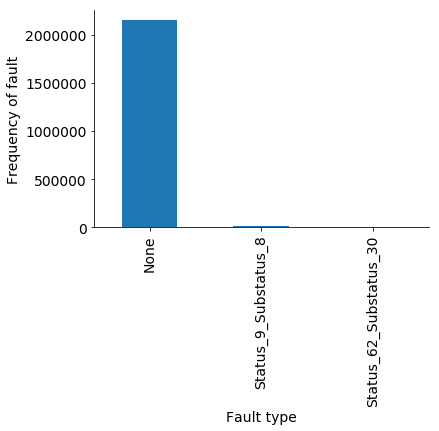

<Figure size 864x648 with 0 Axes>

In [272]:
s = df2['Status'].value_counts()
fig, ax = plt.subplots()

# Remove the plot frame lines. They are unnecessary chartjunk.  
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  

ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.ylabel("Frequency of fault", fontsize=14)  
plt.xlabel("Fault type", fontsize=14)  

df2['Status'].value_counts().plot(ax=ax, kind='bar')
plt.figure(figsize=(12, 9))


In [308]:
df2.head()

,TimeStamp,BESS-WTG01-WindVane (Average),BESS-WTG01-WindSpeed (Average),BESS-WTG01-RotorSpeed (Average),BESS-WTG01-NacelleDirection (Average),BESS-WTG01-ActivePower (Average),BESS-WTG01-Spinner-Temperature (Average),BESS-WTG01-Log-T-Raw-FrontBearingTemperature (Average),BESS-WTG01-Log-T-Raw-RearBearingTemperature (Average),BESS-WTG01-Log-T-Raw-BladeAPitchHeatSink (Average),...,BESS-WTG01-Log-T-Raw-Rectifier1HeatSink (Average),BESS-WTG01-Log-T-Raw-Rectifier2HeatSink (Average),BESS-WTG01-Log-T-Raw-RectifierCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-ExcitationHeatSink (Average),BESS-WTG01-Ambient-Temperature (Average),BESS-WTG01-Log-T-Raw-TowerTemperature (Average),BESS-WTG01-Log-T-Raw-ControlCabinetTemperature (Average),BESS-WTG01-Log-T-Raw-TransformerTemperature (Average),BESS-WTG01-WindDirection (Average),Status
0,25-09-2017 13:20:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
1,25-09-2017 13:20:30,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
2,25-09-2017 13:21:00,18.5,5.1,13.27,123.0,311.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,141.500000,None
3,25-09-2017 13:21:30,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,46.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,None
4,25-09-2017 13:22:00,16.9,5.1,12.95,124.0,276.0,31.0,41.0,37.0,39.0,...,47.0,52.0,49.0,46.0,23.0,34.0,41.0,52.0,140.899994,None


# Building models

In [324]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df2.loc[:,'BESS-WTG01-WindVane (Average)':'BESS-WTG01-WindDirection (Average)'], df2['Status'], test_size=0.33, random_state=42)

In [317]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,class_weight="balanced")
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=2, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [323]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print(accuracy_score(y_train,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.925925511045643

In [344]:
labels = df2["Status"].unique().tolist()
labelsrev = labels.reverse()

TypeError: 'NoneType' object is not iterable

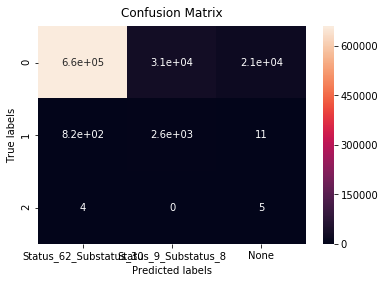

In [350]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labelsrev);

### Splitting the error data on the wanted date (25-09-2017)

In [0]:
import seaborn as sns

fig = plt.figure(figsize = (12,6))
sns.countplot(x='TimeStamp',data = removed_columns)
plt.show()

In [ ]:
# https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html